<a href="https://colab.research.google.com/github/Bosy-Ayman/IR/blob/main/RNN_Elmo_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mining and Information Retrieval - Spring 2024


*   Get words embeddings using a non context-aware and a context-aware model.
*   Compare the similarity of words embeddings of both models.  


### **Setup**

We will use [FLAIR: An Easy-to-Use Framework for State-of-the-Art NLP](https://www.aclweb.org/anthology/N19-4010/). FLAIR make it easy to get words and documents embeddings using a huge number of SOTA models.

In [ ]:
#install FLAIR
# !pip install flair

### **Word embeddings**

# Recap:

We will first use a non context-aware model **GloVe** to get word embeddings as follows

In [ ]:
from flair.data import Sentence
from flair.embeddings import WordEmbeddings

# initialize embedding by specifying which model we want to use
glove_embedding = WordEmbeddings('glove')

In [ ]:
# create sentence. Sentence class holds all meta related to a text
glove_sentence = Sentence('We are travelling to Italy to watch a famous play')
print(glove_sentence)
print(glove_sentence.tokens)
#Sentence will split our sentence to tokens. Let's access the first token
print(glove_sentence[0])

Sentence[10]: "We are travelling to Italy to watch a famous play"
[Token[0]: "We", Token[1]: "are", Token[2]: "travelling", Token[3]: "to", Token[4]: "Italy", Token[5]: "to", Token[6]: "watch", Token[7]: "a", Token[8]: "famous", Token[9]: "play"]
Token[0]: "We"


In [ ]:
#print each token embedding. We will get empty vectors because we did not get the embeddings yet
for token in glove_sentence:
    print(token)
    #print the embedding for each token
    print(token.embedding)

Token[0]: "We"
tensor([])
Token[1]: "are"
tensor([])
Token[2]: "travelling"
tensor([])
Token[3]: "to"
tensor([])
Token[4]: "Italy"
tensor([])
Token[5]: "to"
tensor([])
Token[6]: "watch"
tensor([])
Token[7]: "a"
tensor([])
Token[8]: "famous"
tensor([])
Token[9]: "play"
tensor([])


In [ ]:
# embed a sentence using glove.
glove_embedding.embed(glove_sentence)
# now check out the embedded tokens.
for token in glove_sentence:
    print(token)
    #print the embedding for each token
    print(token.embedding)

Token[0]: "We"
tensor([-0.1779,  0.6267,  0.4787, -0.5530, -0.8493, -0.0708, -0.3472,  0.4628,
         0.1261, -0.2488,  0.4688,  0.0836,  0.5606, -0.2193,  0.0156, -0.5581,
        -0.2074,  0.9123, -1.2034,  0.3011,  0.4668,  0.4830, -0.1020, -0.5680,
        -0.0271,  0.4057, -0.1406, -0.5548,  0.0946, -0.6221, -0.3034,  0.6064,
         0.0498,  0.2220,  0.4855,  0.1763, -0.0905,  0.5371,  0.2755, -0.7883,
        -0.7095, -0.1668,  0.1121, -0.4849, -0.6664,  0.0840,  0.3289, -0.4585,
        -0.3721, -1.5315,  0.1299, -0.2409, -0.1722,  1.3740, -0.2231, -2.6150,
         0.3520,  0.3360,  1.6117,  0.9295, -0.3753,  0.8203, -1.0677, -0.4533,
         1.2332,  0.2375,  0.6352,  0.8286, -0.1744, -0.5853,  0.5634, -0.7309,
         0.3081, -1.0888,  0.4614,  0.0454, -0.1783, -0.0541, -0.8831,  0.0339,
         0.6308, -0.1974, -0.9905,  0.2002, -1.9266, -0.2588,  0.1037, -0.3413,
        -0.9351, -0.5467, -0.4017, -0.3778, -0.0658, -0.1384, -0.9187, -0.0556,
        -0.0806, -0.1953,

In [ ]:
#print the embedding for the word "play"
print("The embedding of the word play")
print(glove_sentence[9].embedding)

The embedding of the word play
tensor([-0.2408,  0.0247,  0.6461, -0.4000, -0.3512,  0.7456,  0.2530,  0.1407,
        -0.9319, -0.3551, -0.0583, -0.4629, -0.3528,  0.1506, -0.1548,  0.2209,
         0.1969,  0.9385, -0.3012,  0.6651,  0.0238,  0.1202,  0.4089,  0.3576,
         0.7272, -0.3942, -0.3571, -0.5079,  0.7247,  0.5239, -1.4761,  0.9837,
         0.1517, -0.2047,  0.4378, -0.3446, -0.5340,  0.5334, -0.6866, -0.5667,
         0.3157, -0.0532, -0.1194, -0.1369, -0.1898, -0.1227,  0.1451, -0.6482,
         0.2514, -1.2370, -0.6425,  0.4000, -0.0588,  0.7735,  0.2392, -2.9341,
        -0.3087, -0.4429,  0.6963,  0.9167, -0.6856,  0.9386, -0.7600, -0.1033,
         0.5508, -0.0460,  0.2931,  0.6355, -0.6446, -0.0816, -0.0425, -0.6625,
         0.5626, -0.4048,  0.2786, -0.1148, -0.4131, -0.0099,  0.1606,  0.1285,
         0.4992, -0.0717, -0.5237, -0.0472, -1.7793, -0.1810, -0.3947,  0.1824,
        -0.1078, -0.2051, -0.5151,  0.1035, -0.3436,  0.1991, -0.4173,  0.0461,
        -

In [ ]:
#print the length of the embedding vector
print("The size of the embedding vector of the word: play")
len(glove_sentence[9].embedding)

The size of the embedding vector of the word: play


100

Let's create another sentence that contains the word **"play"** but with a different meaning.

In [ ]:
# create sentence.
glove_sentence2 = Sentence('They play tennis on their break')

# embed a sentence using glove.
glove_embedding.embed(glove_sentence2)

[Sentence[6]: "They play tennis on their break"]

In [ ]:
#print the embedding of the word "play" in the first sentence
print("The embedding of the word play in the first sentence")
print(glove_sentence[9].embedding)
#print the embedding for the word "play" you will notice it is similar to the emebdding of "play" in the previous sentence
print("The embedding of the word play in the second sentence")
print(glove_sentence2[1].embedding)

The embedding of the word play in the first sentence
tensor([-0.2408,  0.0247,  0.6461, -0.4000, -0.3512,  0.7456,  0.2530,  0.1407,
        -0.9319, -0.3551, -0.0583, -0.4629, -0.3528,  0.1506, -0.1548,  0.2209,
         0.1969,  0.9385, -0.3012,  0.6651,  0.0238,  0.1202,  0.4089,  0.3576,
         0.7272, -0.3942, -0.3571, -0.5079,  0.7247,  0.5239, -1.4761,  0.9837,
         0.1517, -0.2047,  0.4378, -0.3446, -0.5340,  0.5334, -0.6866, -0.5667,
         0.3157, -0.0532, -0.1194, -0.1369, -0.1898, -0.1227,  0.1451, -0.6482,
         0.2514, -1.2370, -0.6425,  0.4000, -0.0588,  0.7735,  0.2392, -2.9341,
        -0.3087, -0.4429,  0.6963,  0.9167, -0.6856,  0.9386, -0.7600, -0.1033,
         0.5508, -0.0460,  0.2931,  0.6355, -0.6446, -0.0816, -0.0425, -0.6625,
         0.5626, -0.4048,  0.2786, -0.1148, -0.4131, -0.0099,  0.1606,  0.1285,
         0.4992, -0.0717, -0.5237, -0.0472, -1.7793, -0.1810, -0.3947,  0.1824,
        -0.1078, -0.2051, -0.5151,  0.1035, -0.3436,  0.1991, -0.41

Check if the word **"play"** have the same embeddings in both sentences when **GloVe** was used.

In [ ]:
from scipy import spatial
similarity= 1 - spatial.distance.cosine(glove_sentence[9].embedding, glove_sentence2[1].embedding)
similarity

1

# Problems of Static Embeddings (word2vec, GLOVE)

Each term has one learned embeddings vector, called “word
type” Embeddings. We can discover problem through the
following example

* I passed over to the river bank
* I withdrew money from my bank account
* There is a shortage in the blood bank

2) Words have different meanings in different contexts!

* We need “Contextual Word Vectors”, called
“word token” embeddings.

# RNN:

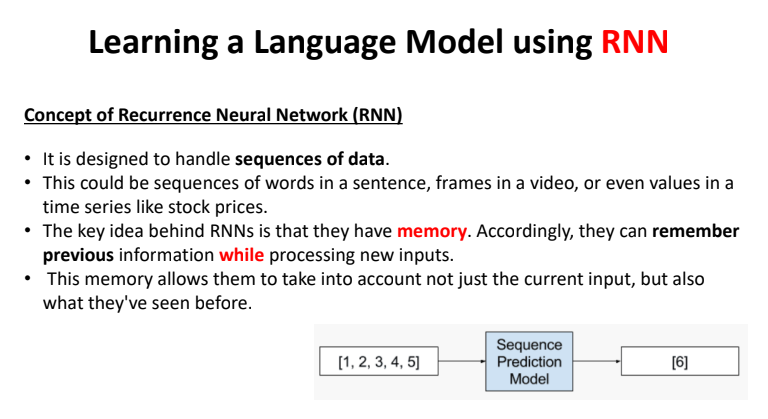

# Structure of RNN:


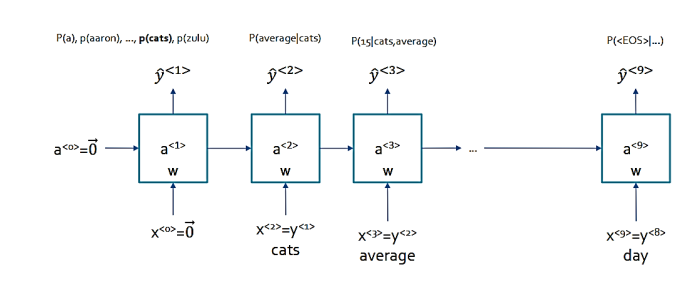

# RNN Problems:

## As the length of the input sequence increases, the memory of the words that start with the model decreases

## Solution: ---> ELMo: a language model that uses a 2-layer bi-directional LSTM (Long Short-Term Memory) (biLMs)

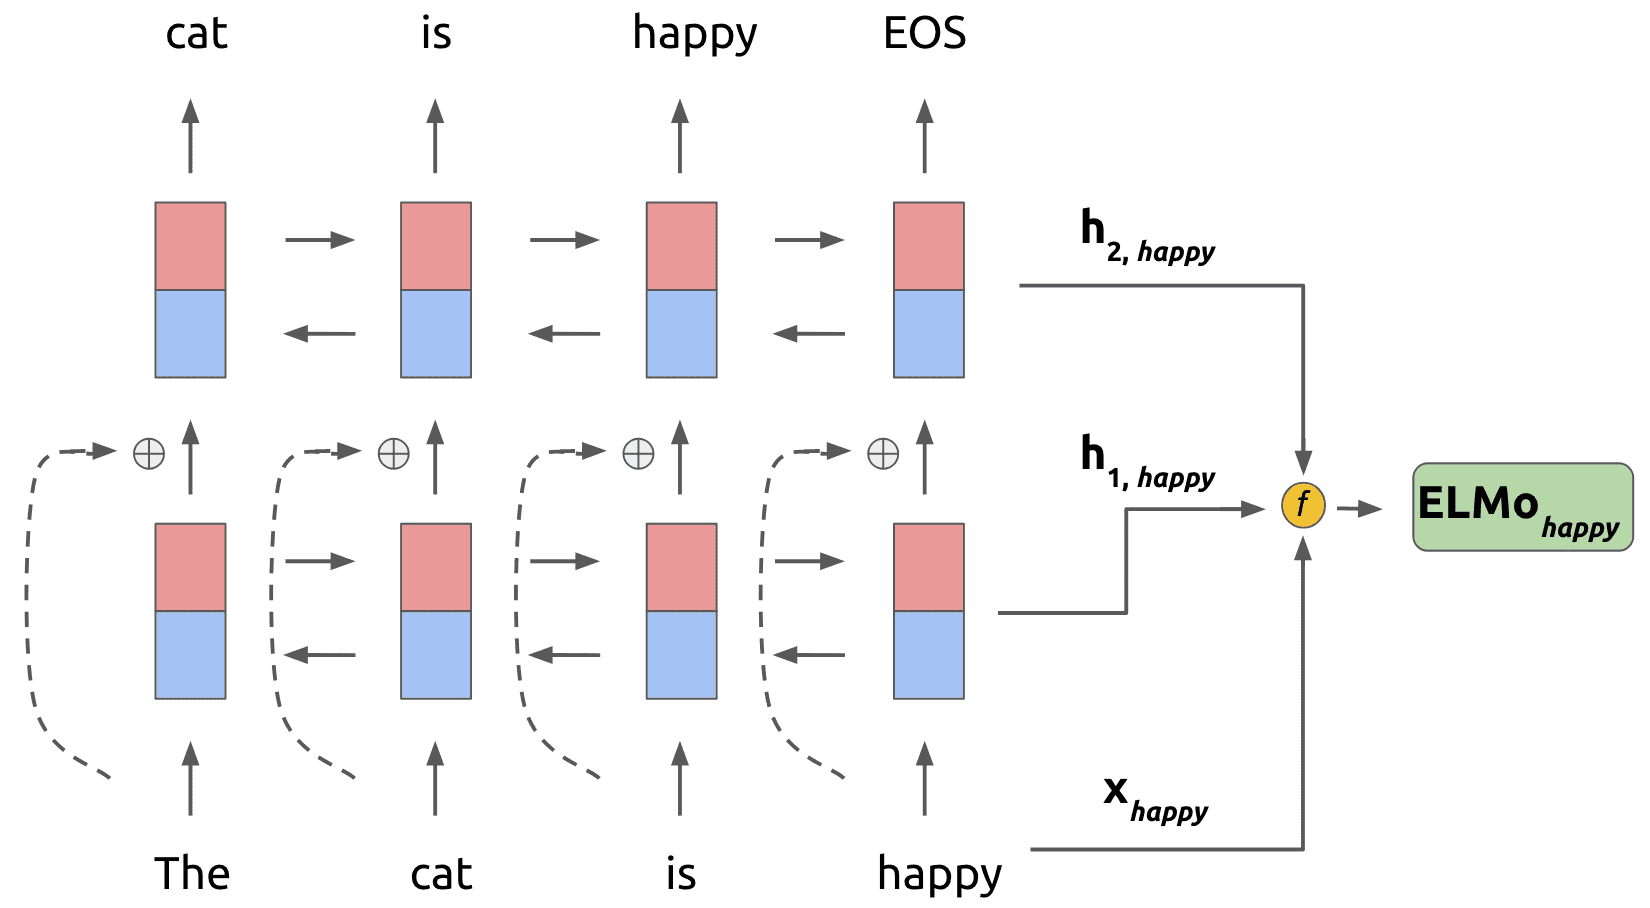

ELMo word embeddings can be constructed by combining ELMo layers in different ways. The available combination strategies are:

*  **"all"**: Use the concatenation of the three ELMo layers.
*  **"top":** Use the top ELMo layer.
* **"average":** Use the average of the three ELMo layers.

By default, the top 3 layers are concatenated to form the word embedding.

Let's try the context-aware model **ELMo**

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np

#load the ELMo model
elmo = hub.load("https://tfhub.dev/google/elmo/3")

#define the sentences
sentences = ["Apple is a fruit", "Apple is a company"]

#generate ELMo embeddings for the sentences
embeddings = elmo.signatures["default"](tf.constant(sentences))["elmo"]

#get the ELMo embeddings for the words "apple" and "Apple"
apple_fruit_embedding = embeddings.numpy()[0][0]  # Embedding for "apple" in the first sentence
apple_company_embedding = embeddings.numpy()[1][0]  # Embedding for "Apple" in the second sentence

#print the embeddings vectors
print("Embedding vector for 'Apple' (fruit):", apple_fruit_embedding)
print("Embedding vector for 'Apple' (company):", apple_company_embedding)


Embedding vector for 'Apple' (fruit): [-0.7403614  -0.26720068  0.18574993 ... -0.11894058 -0.4644878
  0.15787078]
Embedding vector for 'Apple' (company): [-0.7403614  -0.26720068  0.18574993 ... -0.4432274  -0.45189384
  0.17130136]


In [ ]:
embeddings.numpy().shape

(2, 4, 1024)

## the embedding vectors are not the same

In [ ]:
#define the sentences
sentences = ["apple is a fruit", "Apple is a company"]

#generate ELMo embeddings for the sentences
embeddings = elmo.signatures["default"](tf.constant(sentences))["elmo"]

# Get the ELMo embeddings for the words "apple" and "Apple"
apple_fruit_embedding = embeddings.numpy()[0][0]  # Embedding for "apple" in the first sentence
apple_company_embedding = embeddings.numpy()[1][0]  # Embedding for "Apple" in the second sentence

#calculate cosine similarity between the embeddings
def cosine_similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    norm_v1 = np.linalg.norm(v1)
    norm_v2 = np.linalg.norm(v2)
    return dot_product / (norm_v1 * norm_v2)

#compare embeddings
similarity_score = cosine_similarity(apple_fruit_embedding, apple_company_embedding)
print("Cosine similarity between 'apple' (fruit) and 'Apple' (company):", similarity_score)

Cosine similarity between 'apple' (fruit) and 'Apple' (company): 0.41814214


**Notice that the similarity between the words is equal 1 when GloVe was used which means they are exacly similar while it is low when ELMo was used because it is a contextual model.**

### **Exercise1**
Choose either the word "rose" or "tie" to create two different sentences such that they share the same word but with different meanings. Use both ELMo and GloVe to get the words embeddings. Check the similarity between the embeddings of the common word in both sentences when GloVe and ELMo were used.

In [ ]:
#add your solution here

### **Exercise2**

Get the document embeddings for the sentences that you created using both ELMo and GloVe. Compute the similarity between the GloVe sentences embeddings and compare it to the simliarity between the ELMo sentences embeddings.

In [ ]:
#add your solution here